In [122]:
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
import yaml
import seaborn as sns
import matplotlib.pyplot as plt, matplotlib.dates as mdates
import matplotlib.ticker as mtick
import os
from statsmodels.stats.weightstats import DescrStatsW

# check if dir exist if not create it
def check_dir(file_name):
    directory = os.path.dirname(file_name)
    if not os.path.exists(directory):
        os.makedirs(directory)
    print(file_name)

### Read pre-processed data

In [123]:
admin1_start = pd.read_csv('model_dataset_start.csv', index_col=0)
admin1_start['date'] = [datetime.datetime.strptime(str(x), '%Y-%m-%d') for x in admin1_start['date']]
admin1_start
print(admin1_start.columns)

Index(['date', 'id_num', 'trip_num', 'admin1Name_1', 'rwi_pctl',
       'rwi_ctwt_pctl', 'trips/person', 'trip_miles/person', 'miles/person',
       '0_14_pct', '15_64_pct', '0_19_pct', '20_39_pct', '40_64_pct',
       '65p_pct', 'M_pct', 'Population', 'health_fclt_count',
       'admin1_infected', 'first_case', 'ban_travel', 'fed_lockdown_p1',
       'fed_lockdown_p2', 'inter_state_travel_ban'],
      dtype='object')


In [124]:
admin1_start

,date,id_num,trip_num,admin1Name_1,rwi_pctl,rwi_ctwt_pctl,trips/person,trip_miles/person,miles/person,0_14_pct,...,65p_pct,M_pct,Population,health_fclt_count,admin1_infected,first_case,ban_travel,fed_lockdown_p1,fed_lockdown_p2,inter_state_travel_ban
0,2020-01-01,37,87,Bauchi,0.135135,0.081081,2.351351,6.258242,54.280602,0.480968,...,0.026024,0.510844,6690134.0,1312,0.0,0,0,0,0,0
1,2020-01-01,1678,4411,Federal Capital Territory,0.783784,0.756757,2.628725,14.122407,54.866210,0.376181,...,0.014811,0.532027,4834747.0,551,0.0,0,0,0,0,0
2,2020-01-01,609,829,Kano,0.594595,0.837838,1.361248,4.493423,23.784021,0.472768,...,0.026128,0.528023,13612130.0,1562,0.0,0,0,0,0,0
3,2020-01-01,26,49,Kebbi,0.216216,0.135135,1.884615,12.588556,23.815559,0.485590,...,0.026395,0.503300,4510474.0,1079,0.0,0,0,0,0,0
4,2020-01-01,310,587,Kwara,0.270270,0.540541,1.893548,6.798795,27.996452,0.438563,...,0.031433,0.506960,3378707.0,893,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,2020-04-25,50,101,Abia,0.945946,0.918919,2.020000,3.403980,10.260095,0.353459,...,0.047146,0.500580,3878977.0,1228,0.0,1,1,1,1,1
4288,2020-04-25,137,301,Enugu,0.837838,0.783784,2.197080,4.484531,16.508171,0.354833,...,0.047204,0.486070,4415727.0,1387,0.0,1,1,1,1,1
4289,2020-04-25,191,384,Anambra,0.918919,0.945946,2.010471,10.207329,25.444687,0.355056,...,0.041468,0.505982,5936784.0,1628,0.0,1,1,1,1,1
4290,2020-04-25,878,1306,Kaduna,0.405405,0.513514,1.487472,4.388031,9.217139,0.465037,...,0.027457,0.506968,8758047.0,1082,0.0,1,1,1,1,1


### Slight pre-process before visualize

In [125]:
# percentile of rwi
admin1_start['rwi_ctwt_quantile_3_level'] = admin1_start['rwi_ctwt_pctl'].apply(lambda x: 'low-income' if x<0.33 else 'mid-income' if x<0.66 else 'high-income')
admin1_start

,date,id_num,trip_num,admin1Name_1,rwi_pctl,rwi_ctwt_pctl,trips/person,trip_miles/person,miles/person,0_14_pct,...,M_pct,Population,health_fclt_count,admin1_infected,first_case,ban_travel,fed_lockdown_p1,fed_lockdown_p2,inter_state_travel_ban,rwi_ctwt_quantile_3_level
0,2020-01-01,37,87,Bauchi,0.135135,0.081081,2.351351,6.258242,54.280602,0.480968,...,0.510844,6690134.0,1312,0.0,0,0,0,0,0,low-income
1,2020-01-01,1678,4411,Federal Capital Territory,0.783784,0.756757,2.628725,14.122407,54.866210,0.376181,...,0.532027,4834747.0,551,0.0,0,0,0,0,0,high-income
2,2020-01-01,609,829,Kano,0.594595,0.837838,1.361248,4.493423,23.784021,0.472768,...,0.528023,13612130.0,1562,0.0,0,0,0,0,0,high-income
3,2020-01-01,26,49,Kebbi,0.216216,0.135135,1.884615,12.588556,23.815559,0.485590,...,0.503300,4510474.0,1079,0.0,0,0,0,0,0,low-income
4,2020-01-01,310,587,Kwara,0.270270,0.540541,1.893548,6.798795,27.996452,0.438563,...,0.506960,3378707.0,893,0.0,0,0,0,0,0,mid-income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,2020-04-25,50,101,Abia,0.945946,0.918919,2.020000,3.403980,10.260095,0.353459,...,0.500580,3878977.0,1228,0.0,1,1,1,1,1,high-income
4288,2020-04-25,137,301,Enugu,0.837838,0.783784,2.197080,4.484531,16.508171,0.354833,...,0.486070,4415727.0,1387,0.0,1,1,1,1,1,high-income
4289,2020-04-25,191,384,Anambra,0.918919,0.945946,2.010471,10.207329,25.444687,0.355056,...,0.505982,5936784.0,1628,0.0,1,1,1,1,1,high-income
4290,2020-04-25,878,1306,Kaduna,0.405405,0.513514,1.487472,4.388031,9.217139,0.465037,...,0.506968,8758047.0,1082,0.0,1,1,1,1,1,mid-income


In [126]:
admin1_start['trip_kms/person'] = admin1_start['trip_miles/person'] * 1.609344
admin1_start['kms/person'] = admin1_start['miles/person'] * 1.609344

### Visualize

In [127]:
line_w = 4.0

#### absolute trip and mile number, with SD bands

In [128]:
idx_col = 'date'
left_y = 'trips/person'
right_y = 'trip_kms/person'
# right_y = 'trip_miles/person'
left_y_alia = 'daily trip per person'
right_y_alia = 'daily distance(kilometer) per person'
# right_y_alia = 'daily miles per person'
idx_c_alia = 'Date'
left_y_color = '#1690ff'
right_y_color = '#F6546A'

weight_col = 'id_num'
wm = lambda x: np.average(x, weights=admin1_start.loc[x.index, weight_col])

def wm_std(array):
    weighted_stats = DescrStatsW(array, weights=admin1_start.loc[array.index, weight_col], ddof=0)
    return weighted_stats.std

def wm_ci(array):
    weighted_stats = DescrStatsW(array, weights=admin1_start.loc[array.index, weight_col], ddof=0)
    return weighted_stats.tconfint_mean(alpha=0.05)

# Define the aggregation functions and their respective weights
aggregations = {
    left_y: [
        (left_y + '_mean', wm),
        (left_y + '_std', wm_std), 
        (left_y + '_ci', wm_ci), 
            ], 
    right_y: [
        (right_y + '_mean', wm),
        (right_y + '_std', wm_std), 
        (right_y + '_ci', wm_ci), 
        ], 
                }

grp_cols = ['date']
temp_data = admin1_start[[left_y, right_y, 'id_num'] + grp_cols] \
    .groupby(grp_cols) \
    .agg(aggregations) \

temp_data


trips/person                   \
           trips/person_mean trips/person_std   
date                                            
2020-01-01          1.834659         0.258808   
2020-01-02          1.961282         0.342124   
2020-01-03          1.852160         0.294131   
2020-01-04          1.863940         0.259470   
2020-01-05          1.886834         0.233617   
...                      ...              ...   
2020-04-21          2.135518         0.354593   
2020-04-22          2.057414         0.310474   
2020-04-23          2.062218         0.385293   
2020-04-24          2.295052         0.413698   
2020-04-25          2.069900         0.332210   

                                                          trip_kms/person  \
                                     trips/person_ci trip_kms/person_mean   
date                                                                        
2020-01-01   (1.8312961664722924, 1.838021466112619)            14.889095   
2020-01-02  (1.9570898713888623, 1.9654731291971896)            14.519493   
2020-01-03  (1.8483630982619559, 1.8559575680576694)            13.907012   
2020-01-04  (1.8607311552085566, 1.8671497080549617)            14.128170   
2020-01-05  (1.8840324472530432, 1.8896358041601264)            13.746027   
...                                              ...                  ...   
2020-04-21   (2.1310358629916872, 2.140001115503384)             8.719676   
2020-04-22   (2.0534438695250774, 2.061384186314214)             8.484265   
2020-04-23   (2.0571192120877924, 2.067316723916583)             8.219817   
2020-04-24  (2.2887493852431384, 2.3013551275340016)             6.841352   
2020-04-25    (2.06555635034506, 2.0742434271855292)             8.084760   

                                                                          
           trip_kms/person_std                        trip_kms/person_ci  
date                                                                      
2020-01-01            3.500355  (14.843615473272123, 14.934574585867711)  
2020-01-02            4.967706    (14.458629644807344, 14.5803562345265)  
2020-01-03            4.096609    (13.854124360453616, 13.9598987391984)  
2020-01-04            4.700817   (14.07002784823596, 14.186312686299772)  
2020-01-05            3.635649  (13.702425929634765, 13.789627938386404)  
...                        ...                                       ...  
2020-04-21            3.102799     (8.680451530966943, 8.75890034741166)  
2020-04-22            3.358560    (8.441317550365948, 8.527212138504161)  
2020-04-23            4.529222    (8.159879316259524, 8.279753898323172)  
2020-04-24            2.346371    (6.805603722629081, 6.877099633305696)  
2020-04-25            4.039291    (8.031947127496656, 8.137572052551045)  

[116 rows x 6 columns]

In [129]:
temp_data.columns = temp_data.columns.droplevel(0)

temp_data

,trips/person_mean,trips/person_std,trips/person_ci,trip_kms/person_mean,trip_kms/person_std,trip_kms/person_ci
date,,,,,,
2020-01-01,1.834659,0.258808,"(1.8312961664722924, 1.838021466112619)",14.889095,3.500355,"(14.843615473272123, 14.934574585867711)"
2020-01-02,1.961282,0.342124,"(1.9570898713888623, 1.9654731291971896)",14.519493,4.967706,"(14.458629644807344, 14.5803562345265)"
2020-01-03,1.852160,0.294131,"(1.8483630982619559, 1.8559575680576694)",13.907012,4.096609,"(13.854124360453616, 13.9598987391984)"
2020-01-04,1.863940,0.259470,"(1.8607311552085566, 1.8671497080549617)",14.128170,4.700817,"(14.07002784823596, 14.186312686299772)"
2020-01-05,1.886834,0.233617,"(1.8840324472530432, 1.8896358041601264)",13.746027,3.635649,"(13.702425929634765, 13.789627938386404)"
...,...,...,...,...,...,...
2020-04-21,2.135518,0.354593,"(2.1310358629916872, 2.140001115503384)",8.719676,3.102799,"(8.680451530966943, 8.75890034741166)"
2020-04-22,2.057414,0.310474,"(2.0534438695250774, 2.061384186314214)",8.484265,3.358560,"(8.441317550365948, 8.527212138504161)"
2020-04-23,2.062218,0.385293,"(2.0571192120877924, 2.067316723916583)",8.219817,4.529222,"(8.159879316259524, 8.279753898323172)"


figure/daily trip per person_daily distance(kilometer) per person.png


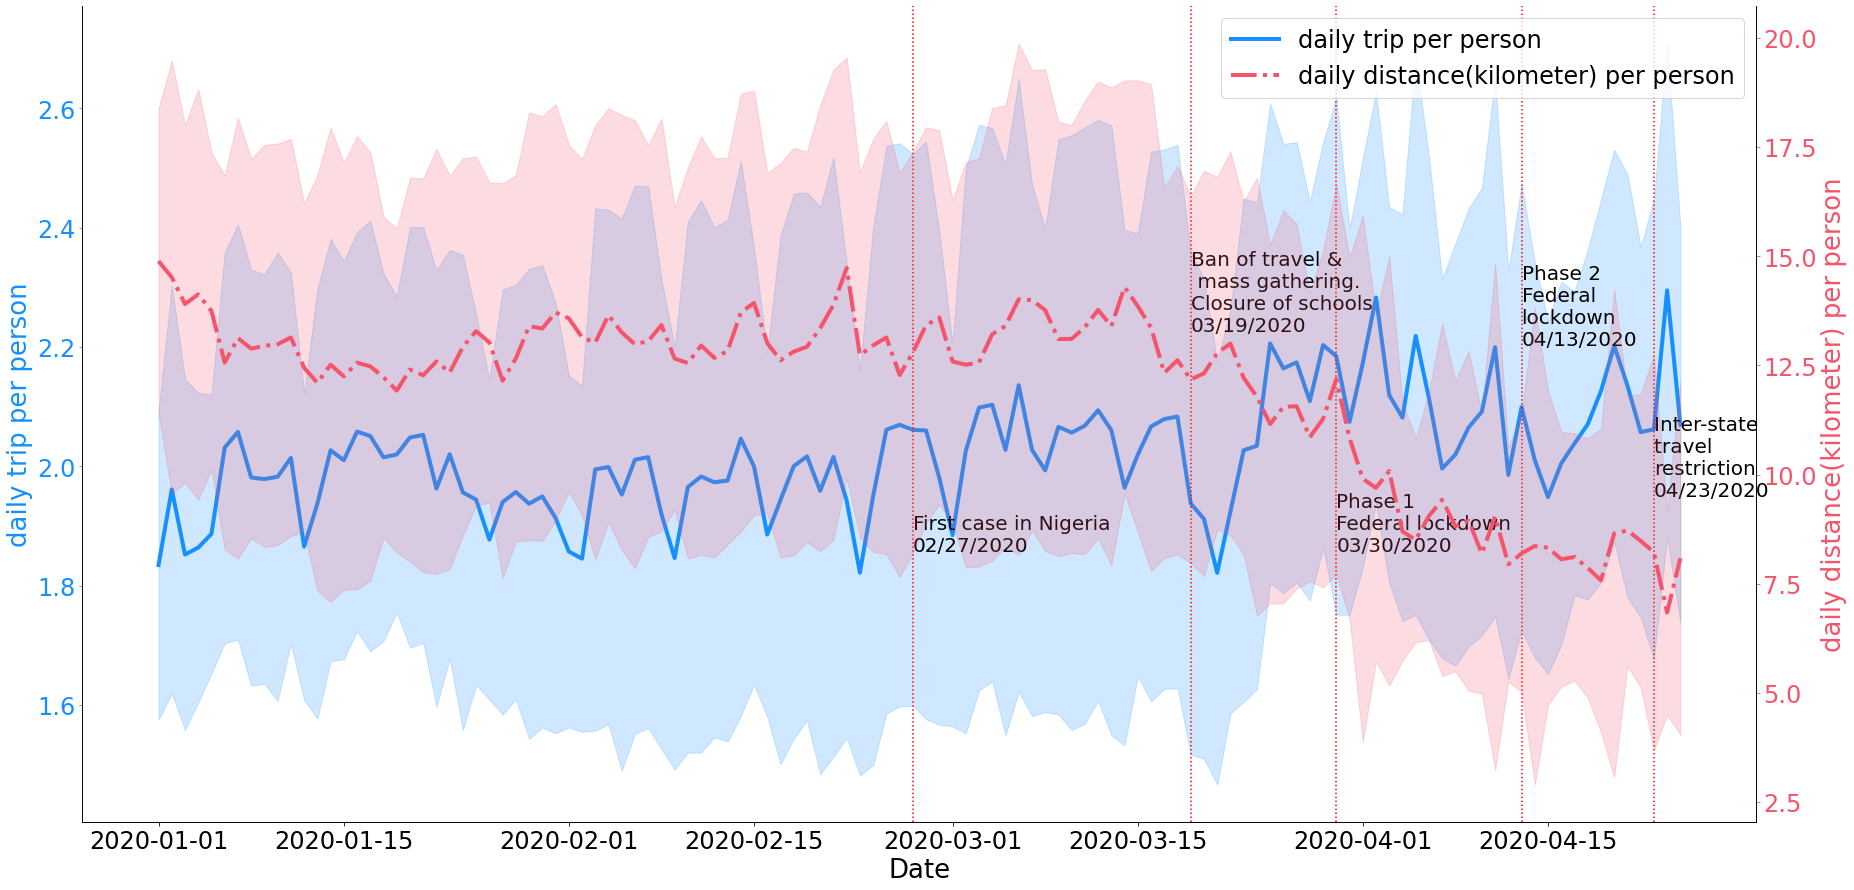

In [130]:
### Visualize
fig, host = plt.subplots(1,1,figsize=(30, 15))

host.plot(temp_data.index, temp_data[left_y + '_mean'], color=left_y_color, linewidth=line_w, label=left_y_alia)
host.fill_between(temp_data.index, temp_data[left_y + '_mean']-temp_data[left_y + '_std'], temp_data[left_y + '_mean']+temp_data[left_y + '_std'], alpha=0.2, color=left_y_color)
ax2 = host.twinx()
ax2.plot(temp_data.index, temp_data[right_y + '_mean'], color=right_y_color, linewidth=line_w, label=right_y_alia)
ax2.fill_between(temp_data.index, temp_data[right_y + '_mean']-temp_data[right_y + '_std'], temp_data[right_y + '_mean']+temp_data[right_y + '_std'], alpha=0.2,color=right_y_color)

host.tick_params(axis='x', labelsize = 24)
host.tick_params(axis='y', labelsize = 24, color=left_y_color, labelcolor=left_y_color)
ax2.tick_params(axis='y', labelsize = 24, color=right_y_color, labelcolor=right_y_color)
host.set_xlabel(idx_c_alia,fontsize=26)
host.set_ylabel(left_y_alia,fontsize=26, color=left_y_color)
ax2.set_ylabel(right_y_alia,fontsize=26, color=right_y_color)

ax2.lines[0].set_linestyle("-.")

# Hide the right and top spines
host.spines[['top']].set_visible(False)
ax2.spines[['top']].set_visible(False)

# put legend from 2 axes together
handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
plt.legend(handles,labels,fontsize=24)

max_value = temp_data[left_y + '_mean'].max()
min_value = temp_data[left_y + '_mean'].min()

host.axvline(datetime.datetime(2020,2,27), linestyle = ':', color='red')
host.text(datetime.datetime(2020,2,27), 1.02*min_value, 'First case in Nigeria\n02/27/2020', fontsize=20, rotation=0)
host.axvline(datetime.datetime(2020,3,19), linestyle = ':', color='red')
host.text(datetime.datetime(2020,3,19), 0.97*max_value, 'Ban of travel &\n mass gathering.\nClosure of schools\n03/19/2020', fontsize=20, rotation=0)
host.axvline(datetime.datetime(2020,3,30), linestyle = ':', color='red')
host.text(datetime.datetime(2020,3,30), 1.02*min_value, 'Phase 1 \nFederal lockdown\n03/30/2020', fontsize=20, rotation=0)
host.axvline(datetime.datetime(2020,4,13), linestyle = ':', color='red')
host.text(datetime.datetime(2020,4,13), 0.96*max_value, 'Phase 2 \nFederal \nlockdown\n04/13/2020', fontsize=20, rotation=0)
host.axvline(datetime.datetime(2020,4,23), linestyle = ':', color='red')
host.text(datetime.datetime(2020,4,23), 0.85*max_value, 'Inter-state \ntravel \nrestriction\n04/23/2020', fontsize=20, rotation=0)

temp_path = 'figure/%s_%s.png' % (left_y_alia, right_y_alia)
check_dir(temp_path)
fig.savefig(temp_path, bbox_inches='tight', dpi=300)

#### trips per person change, by date, by RWI ranking. 

In [132]:
line_w = 4.0

rwi_ctwt_quantile_3_level  high-income  low-income  mid-income
date                                                          
2020-01-31                    1.000000    1.000000    1.000000
2020-02-29                    1.010028    0.982893    0.953742
2020-03-31                    1.054231    1.016911    0.987848
2020-04-30                    1.101807    0.844778    0.979237
figure/daily trips per person_Relative Wealth Index_7D_MA.png


c:\Users\k5coo\anaconda3\envs\trsp\lib\site-packages\ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\k5coo\anaconda3\envs\trsp\lib\site-packages\ipykernel_launcher.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator


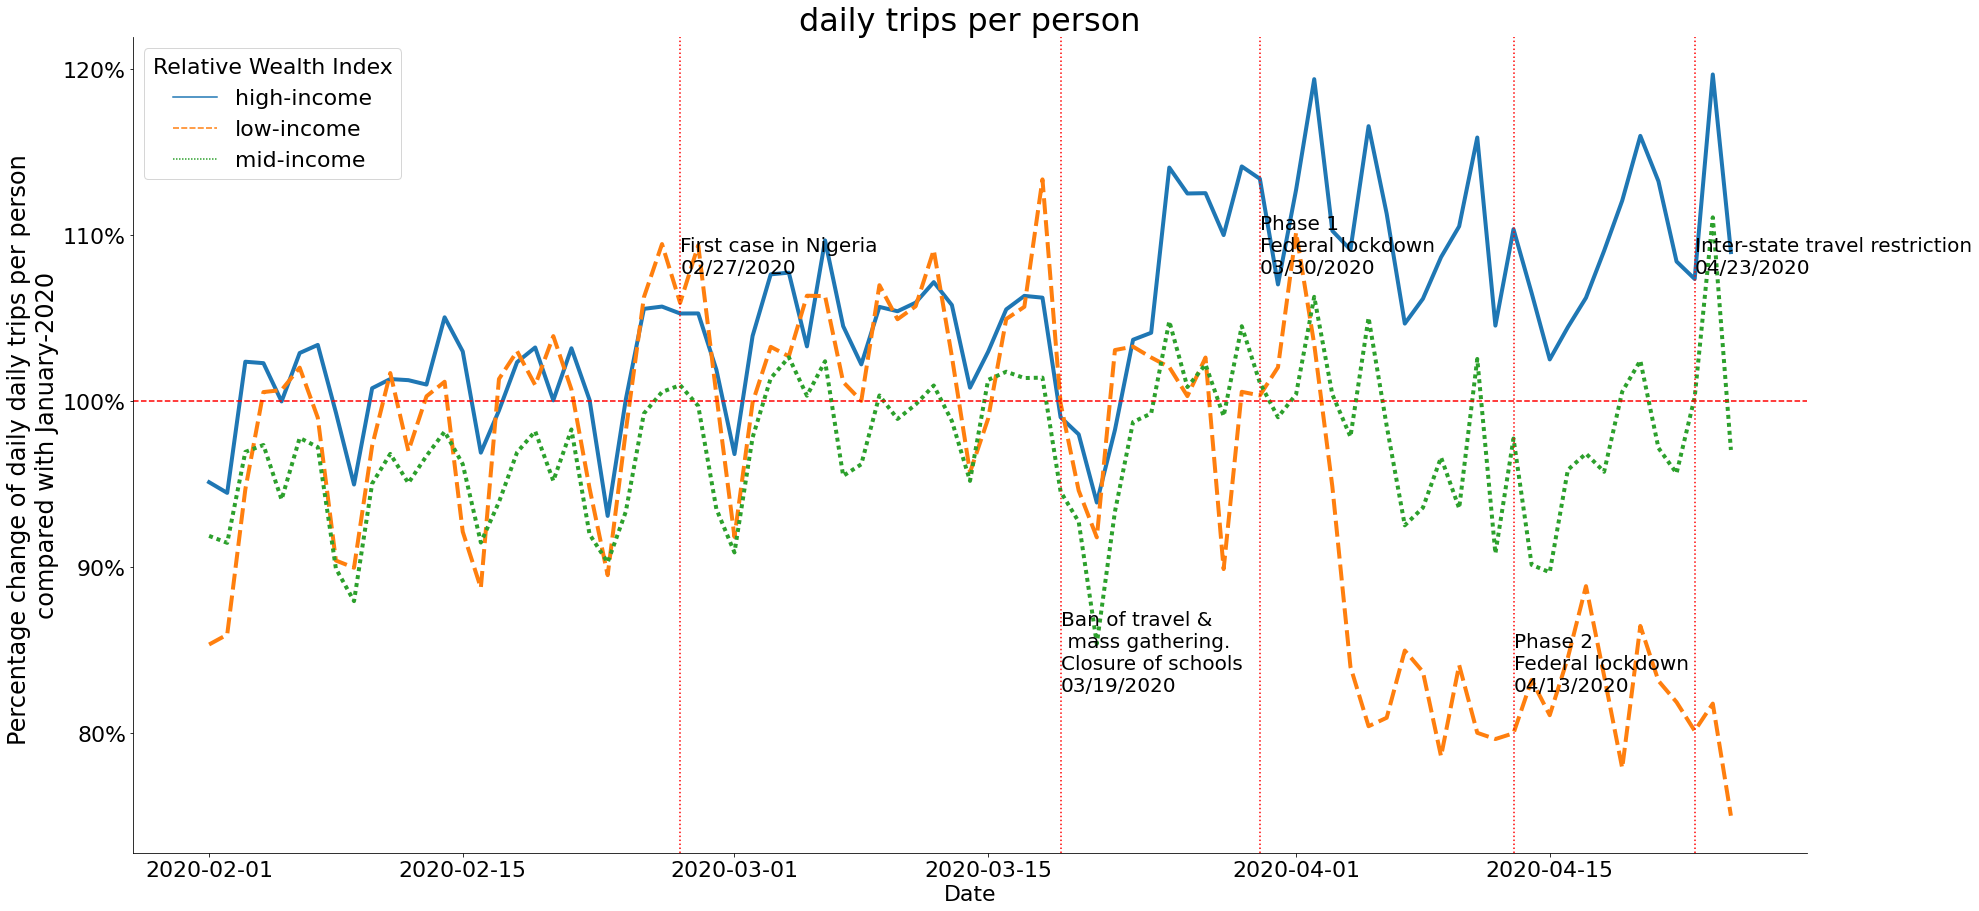

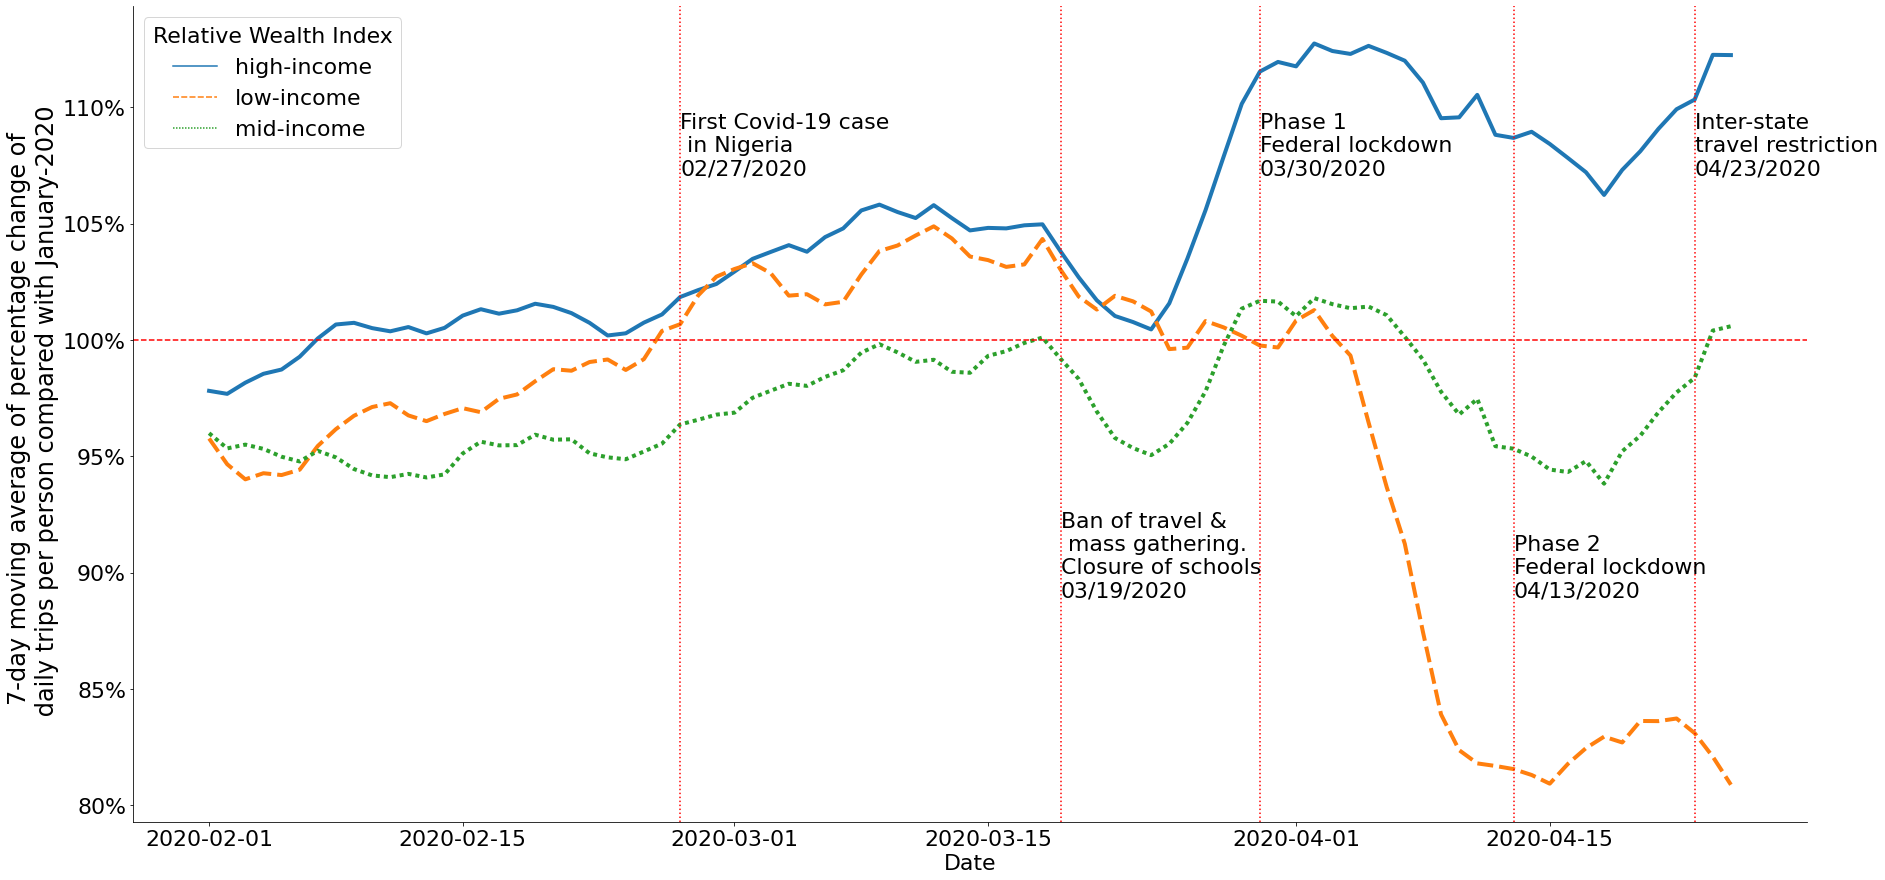

In [133]:
val_c = 'trips/person'
idx_c = 'date'
col_c = 'rwi_ctwt_quantile_3_level'

val_c_alia = 'daily trips per person'
idx_c_alia = 'Date'
col_c_alia = 'Relative Wealth Index'

# Define a lambda function to compute the weighted mean:
wm = lambda x: np.average(x, weights=admin1_start.loc[x.index, "id_num"])

pivot_1 = pd.pivot_table(admin1_start, values=val_c, index=idx_c, columns=col_c, aggfunc=wm)

### convert pivot table into percentage change compared with baseline
pivot_baseline = pivot_1.iloc[:31, :].mean(axis=0)
pivot_1_pct = pivot_1.div(pivot_baseline, axis=1)
### average by month
print(pivot_1_pct.resample('M').mean())

max_value = pivot_1_pct.max().max()
min_value = pivot_1_pct.min().min()

### Visualize
plt.figure(figsize=(30,15))
sns.lineplot(data=pivot_1_pct.iloc[31:, :], linewidth=line_w)
sns.despine()
plt.axhline(1, linestyle = '--', color='red')
plt.axvline(datetime.datetime(2020,2,27), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,2,27), 0.9*max_value, 'First case in Nigeria\n02/27/2020', fontsize=20, rotation=0)
plt.axvline(datetime.datetime(2020,3,19), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,3,19), 1.1*min_value, 'Ban of travel &\n mass gathering.\nClosure of schools\n03/19/2020', fontsize=20, rotation=0)
plt.axvline(datetime.datetime(2020,3,30), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,3,30), 0.9*max_value, 'Phase 1 \nFederal lockdown\n03/30/2020', fontsize=20, rotation=0)
plt.axvline(datetime.datetime(2020,4,13), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,4,13), 1.1*min_value, 'Phase 2 \nFederal lockdown\n04/13/2020', fontsize=20, rotation=0)
plt.axvline(datetime.datetime(2020,4,23), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,4,23), 0.9*max_value, 'Inter-state travel restriction\n04/23/2020', fontsize=20, rotation=0)

plt.title('%s' % val_c_alia, fontsize=32)
plt.xlabel('%s' % idx_c_alia, fontsize=22)
plt.ylabel('Percentage change of daily %s \ncompared with January-2020' % val_c_alia, fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
legend = plt.legend(fontsize=22, title='%s' % col_c_alia, loc='best')
plt.setp(legend.get_title(),fontsize=22)

### plot 7-day moving average
max_value = pivot_1_pct.rolling(7).mean().iloc[31:, :].max().max()
min_value = pivot_1_pct.rolling(7).mean().iloc[31:, :].min().min()
plt.figure(figsize=(30,15))
sns.lineplot(data=pivot_1_pct.rolling(7).mean().iloc[31:, :], linewidth=line_w)
sns.despine()
plt.axhline(1, linestyle = '--', color='red')
plt.axvline(datetime.datetime(2020,2,27), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,2,27), 0.95*max_value, 'First Covid-19 case\n in Nigeria\n02/27/2020', fontsize=22, rotation=0)
plt.axvline(datetime.datetime(2020,3,19), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,3,19), 1.1*min_value, 'Ban of travel &\n mass gathering.\nClosure of schools\n03/19/2020', fontsize=22, rotation=0)
plt.axvline(datetime.datetime(2020,3,30), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,3,30), 0.95*max_value, 'Phase 1 \nFederal lockdown\n03/30/2020', fontsize=22, rotation=0)
plt.axvline(datetime.datetime(2020,4,13), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,4,13), 1.1*min_value, 'Phase 2 \nFederal lockdown\n04/13/2020', fontsize=22, rotation=0)
plt.axvline(datetime.datetime(2020,4,23), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,4,23), 0.95*max_value, 'Inter-state \ntravel restriction\n04/23/2020', fontsize=22, rotation=0)
plt.xlabel('%s' % idx_c_alia, fontsize=22)
plt.ylabel('7-day moving average of percentage change of \n %s compared with January-2020' % val_c_alia, fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
legend = plt.legend(fontsize=22, title='%s' % col_c_alia, loc='best')
plt.setp(legend.get_title(),fontsize=22)

temp_path = 'figure/%s_%s_7D_MA.png' % (val_c_alia.replace("/", "-"), col_c_alia)
check_dir(temp_path)
plt.savefig(temp_path, bbox_inches='tight', dpi=300)

#### distance per person change, by date, by RWI ranking. 

rwi_ctwt_quantile_3_level  high-income  low-income  mid-income
date                                                          
2020-01-31                    1.000000    1.000000    1.000000
2020-02-29                    1.119928    0.962402    0.981972
2020-03-31                    1.034476    0.921822    0.989887
2020-04-30                    0.443920    0.500211    0.534090
figure/daily distance(km) per person_Relative Wealth Index_7D_MA.png


c:\Users\k5coo\anaconda3\envs\trsp\lib\site-packages\ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\k5coo\anaconda3\envs\trsp\lib\site-packages\ipykernel_launcher.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator


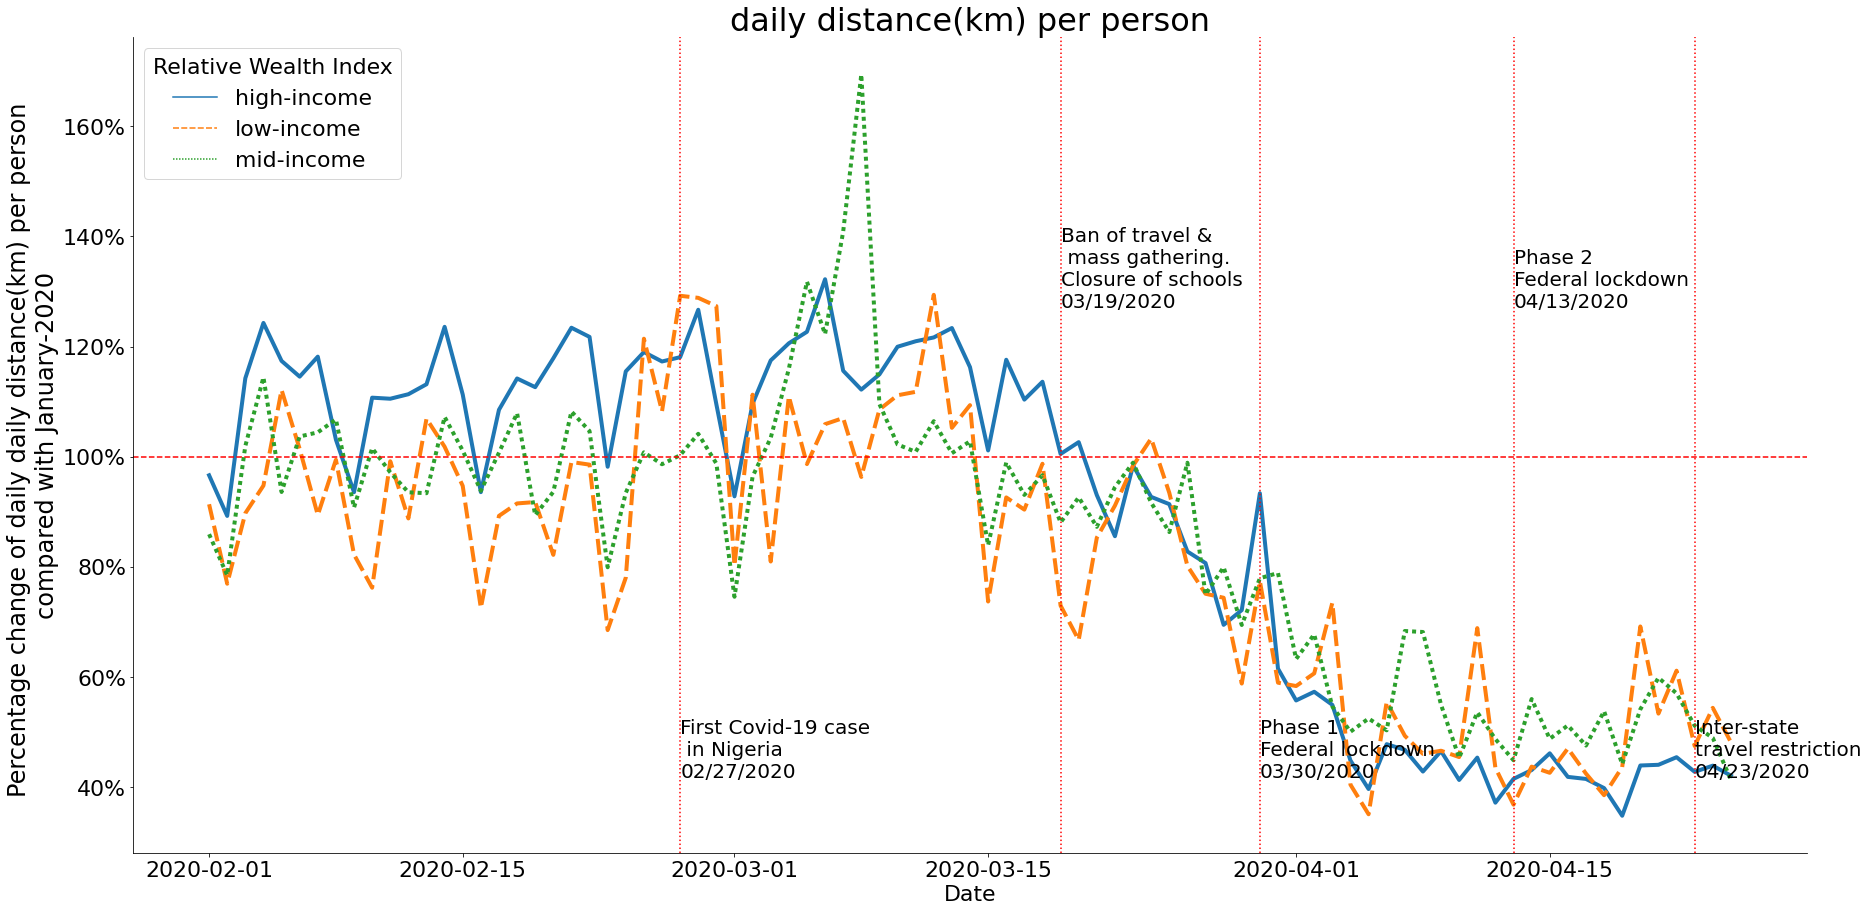

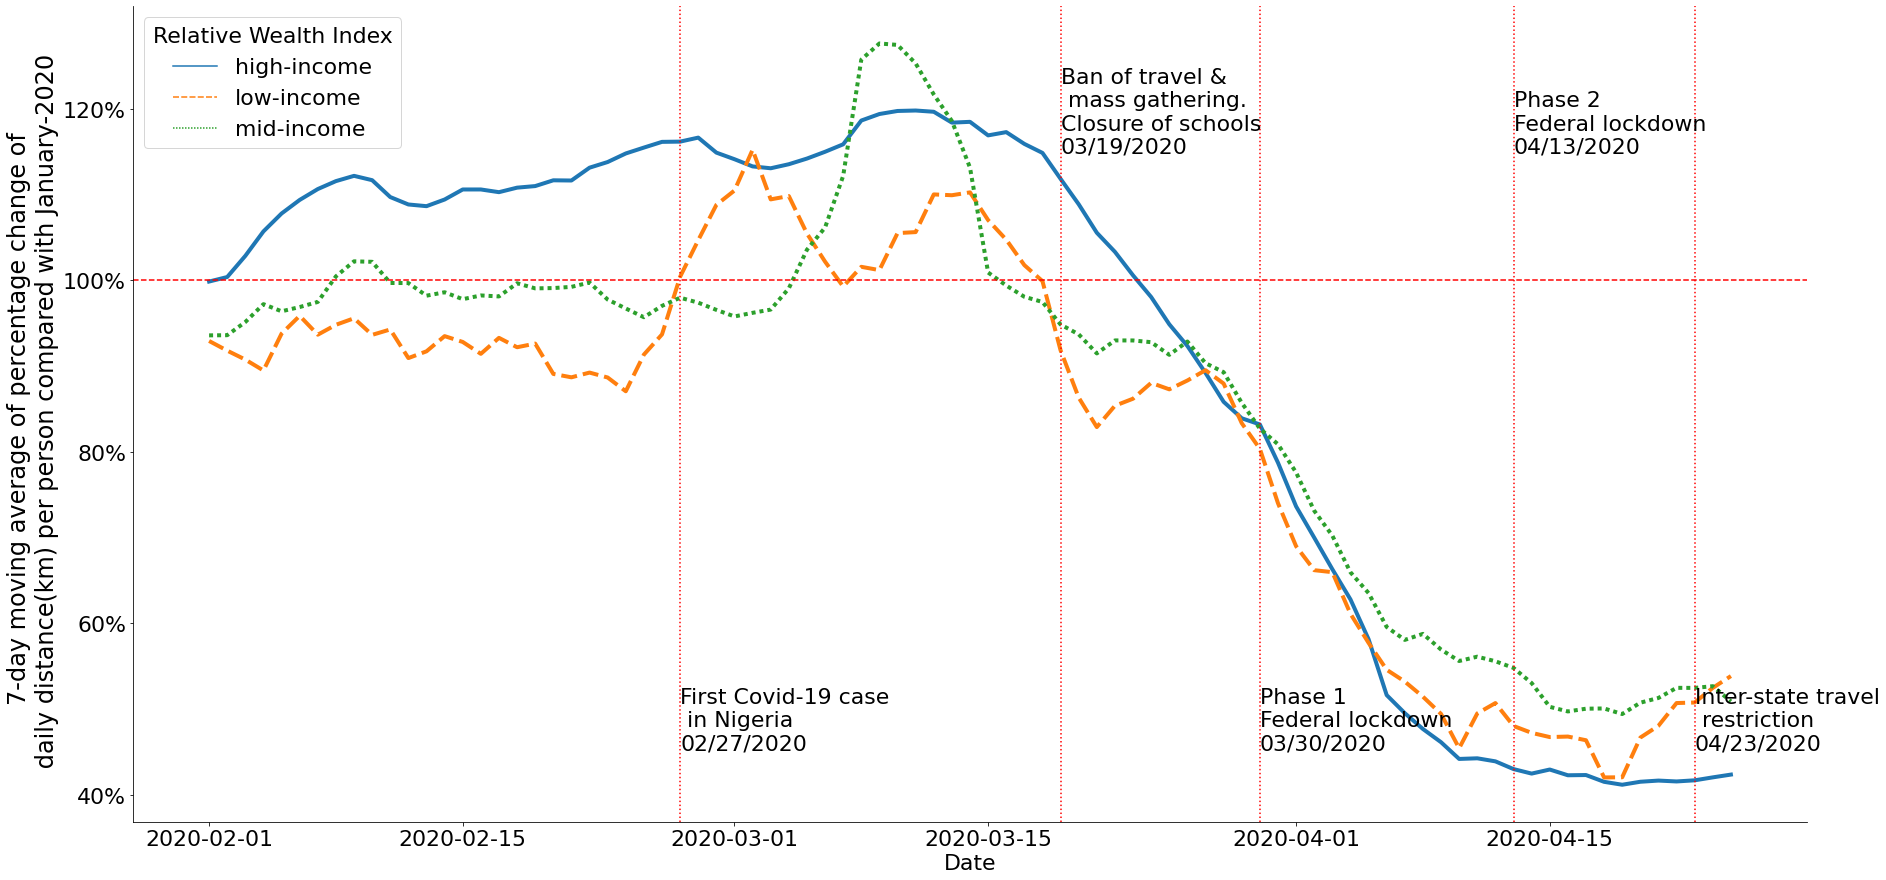

In [134]:
val_c = 'kms/person'
idx_c = 'date'
col_c = 'rwi_ctwt_quantile_3_level'

val_c_alia = 'daily distance(km) per person'
idx_c_alia = 'Date'
col_c_alia = 'Relative Wealth Index'

# Define a lambda function to compute the weighted mean:
wm = lambda x: np.average(x, weights=admin1_start.loc[x.index, "id_num"])

# pivot_1 = pd.pivot_table(admin1_start, values=val_c, index=idx_c, columns=col_c, aggfunc=np.mean)
pivot_1 = pd.pivot_table(admin1_start, values=val_c, index=idx_c, columns=col_c, aggfunc=wm)

### convert pivot table into percentage change compared with baseline
pivot_baseline = pivot_1.iloc[:31, :].mean(axis=0)
pivot_1_pct = pivot_1.div(pivot_baseline, axis=1)
### average by month
print(pivot_1_pct.resample('M').mean())

max_value = pivot_1_pct.max().max()
min_value = pivot_1_pct.min().min()

### Visualize
plt.figure(figsize=(30,15))
sns.lineplot(data=pivot_1_pct.iloc[31:, :], linewidth=line_w)
sns.despine()
plt.axhline(1, linestyle = '--', color='red')
plt.axvline(datetime.datetime(2020,2,27), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,2,27), 1.20*min_value, 'First Covid-19 case\n in Nigeria\n02/27/2020', fontsize=20, rotation=0)
plt.axvline(datetime.datetime(2020,3,19), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,3,19), 0.75*max_value, 'Ban of travel &\n mass gathering.\nClosure of schools\n03/19/2020', fontsize=20, rotation=0)
plt.axvline(datetime.datetime(2020,3,30), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,3,30), 1.20*min_value, 'Phase 1 \nFederal lockdown\n03/30/2020', fontsize=20, rotation=0)
plt.axvline(datetime.datetime(2020,4,13), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,4,13), 0.75*max_value, 'Phase 2 \nFederal lockdown\n04/13/2020', fontsize=20, rotation=0)
plt.axvline(datetime.datetime(2020,4,23), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,4,23), 1.20*min_value, 'Inter-state \ntravel restriction\n04/23/2020', fontsize=20, rotation=0)

plt.title('%s' % val_c_alia, fontsize=32)
plt.xlabel('%s' % idx_c_alia, fontsize=22)
plt.ylabel('Percentage change of daily %s \ncompared with January-2020' % val_c_alia, fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
legend = plt.legend(fontsize=22, title='%s' % col_c_alia, loc='best')
plt.setp(legend.get_title(),fontsize=22)

### plot 7-day moving average
max_value = pivot_1_pct.rolling(7).mean().iloc[31:, :].max().max()
min_value = pivot_1_pct.rolling(7).mean().iloc[31:, :].min().min()
plt.figure(figsize=(30,15))
sns.lineplot(data=pivot_1_pct.rolling(7).mean().iloc[31:, :], linewidth=line_w)
sns.despine()
plt.axhline(1, linestyle = '--', color='red')
plt.axvline(datetime.datetime(2020,2,27), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,2,27), 1.1*min_value, 'First Covid-19 case\n in Nigeria\n02/27/2020', fontsize=22, rotation=0)
plt.axvline(datetime.datetime(2020,3,19), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,3,19), 0.90*max_value, 'Ban of travel &\n mass gathering.\nClosure of schools\n03/19/2020', fontsize=22, rotation=0)
plt.axvline(datetime.datetime(2020,3,30), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,3,30), 1.1*min_value, 'Phase 1 \nFederal lockdown\n03/30/2020', fontsize=22, rotation=0)
plt.axvline(datetime.datetime(2020,4,13), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,4,13), 0.90*max_value, 'Phase 2 \nFederal lockdown\n04/13/2020', fontsize=22, rotation=0)
plt.axvline(datetime.datetime(2020,4,23), linestyle = ':', color='red')
plt.text(datetime.datetime(2020,4,23), 1.1*min_value, 'Inter-state travel\n restriction\n04/23/2020', fontsize=22, rotation=0)
plt.xlabel('%s' % idx_c_alia, fontsize=22)
plt.ylabel('7-day moving average of percentage change of \n %s compared with January-2020' % val_c_alia, fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
legend = plt.legend(fontsize=22, title='%s' % col_c_alia, loc='best')
plt.setp(legend.get_title(),fontsize=22)

temp_path = 'figure/%s_%s_7D_MA.png' % (val_c_alia.replace("/", "-"), col_c_alia)
check_dir(temp_path)
plt.savefig('figure/%s_%s_7D_MA.png' % (val_c_alia.replace("/", "-"), col_c_alia), bbox_inches='tight', dpi=300)